In [6]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Path to the Excel file
file_path = 'DataBase.xlsx'

In [8]:
# Load each sheet into a separate DataFrame
orders_df = pd.read_excel(file_path, sheet_name='Orders')
salesperson_df = pd.read_excel(file_path, sheet_name='Salesperson')
customer_df = pd.read_excel(file_path, sheet_name='Customer')
city_df = pd.read_excel(file_path, sheet_name='City')

In [31]:
# Display the first few rows of each DataFrame
orders_df.head(), salesperson_df.head(), customer_df.head(), city_df.head()

(   OrderDate  OrderID ScheduledDeliveryDate e-BL_IssuedDate  \
 0 2020-08-07  5764070            2020-08-11      2020-08-11   
 1 2020-08-07  5764069            2020-08-11      2020-08-11   
 2 2020-08-11  5765934            2020-08-15      2020-08-17   
 3 2020-08-11  5765935            2020-08-15      2020-08-17   
 4 2020-08-12  5766151            2020-08-16      2020-08-17   
 
   ActualDeliveryDate  SalespersonID  CustomerID  Returns  
 0                NaT           3825      177170        0  
 1                NaT           3825      177170        0  
 2                NaT            839      174918        0  
 3                NaT            839      174918        0  
 4                NaT           3522       50735        0  ,
    SalespersonID Salesperson    Team
 0           3405         ITP   COAST
 1           3630         GSP   COAST
 2           3875     ITP-CEN  VALLEY
 3           3523     BCA-CMB   COAST
 4           3846         ICR   SOUTH,
    CustomerID        Cu

In [9]:
# Summary statistics for the 'Orders' DataFrame
orders_summary = orders_df.describe(include='all')
orders_summary


,OrderDate,OrderID,ScheduledDeliveryDate,e-BL_IssuedDate,ActualDeliveryDate,SalespersonID,CustomerID,Returns
count,243343,2.433430e+05,243341,243343,242269,243343.000000,243343.000000,243343.000000
unique,553,NaN,587,408,534,NaN,NaN,NaN
top,2019-12-10 00:00:00,NaN,2019-12-14 00:00:00,2019-12-13 00:00:00,2019-10-11 00:00:00,NaN,NaN,NaN
freq,1068,NaN,1069,1180,904,NaN,NaN,NaN
first,2019-01-10 00:00:00,NaN,2019-01-13 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,NaN,NaN,NaN
last,2020-08-17 00:00:00,NaN,2020-08-21 00:00:00,2020-08-17 00:00:00,2020-08-14 00:00:00,NaN,NaN,NaN
mean,NaN,5.594759e+06,NaN,NaN,NaN,3157.619101,124991.963163,0.150964
std,NaN,1.020853e+05,NaN,NaN,NaN,1269.336641,45149.479762,2.346439
min,NaN,5.415486e+06,NaN,NaN,NaN,1.000000,2.000000,0.000000
25%,NaN,5.504324e+06,NaN,NaN,NaN,3459.000000,80510.000000,0.000000


In [33]:
# Data types for the 'Orders' DataFrame
orders_data_types = orders_df.dtypes
orders_data_types

OrderDate                datetime64[ns]
OrderID                           int64
ScheduledDeliveryDate    datetime64[ns]
e-BL_IssuedDate          datetime64[ns]
ActualDeliveryDate       datetime64[ns]
SalespersonID                     int64
CustomerID                        int64
Returns                           int64
dtype: object

In [34]:
# Check for missing values in the 'Orders' DataFrame
orders_missing_values = orders_df.isnull().sum()
orders_missing_values

OrderDate                   0
OrderID                     0
ScheduledDeliveryDate       2
e-BL_IssuedDate             0
ActualDeliveryDate       1074
SalespersonID               0
CustomerID                  0
Returns                     0
dtype: int64

In [35]:
# Remove rows with missing 'ScheduledDeliveryDate'
orders_df.dropna(subset=['ScheduledDeliveryDate'], inplace=True)

# Check the shape of the DataFrame after removing missing values
orders_df.shape

(243341, 8)

In [36]:
# Display a sample of rows with missing 'ActualDeliveryDate'
orders_with_missing_actual_delivery_date = orders_df[orders_df['ActualDeliveryDate'].isnull()]
orders_with_missing_actual_delivery_date.sample(12)

,OrderDate,OrderID,ScheduledDeliveryDate,e-BL_IssuedDate,ActualDeliveryDate,SalespersonID,CustomerID,Returns
670,2020-08-13,5767348,2020-08-17,2020-08-14,NaT,3940,172126,0
355,2020-08-11,5765518,2020-08-15,2020-08-14,NaT,3779,165590,0
643,2020-08-13,5767266,2020-08-17,2020-08-14,NaT,3858,175820,0
609,2020-08-13,5767397,2020-08-17,2020-08-14,NaT,3553,136341,0
982,2020-08-10,5763998,2020-08-14,2020-08-12,NaT,3313,103101,0
1068,2020-08-11,5765268,2020-08-15,2020-08-13,NaT,3405,91054,0
253,2020-08-14,5768300,2020-08-18,2020-08-17,NaT,3313,171022,0
236,2020-08-14,5768771,2020-08-18,2020-08-17,NaT,3894,71803,0
321,2020-08-07,5763583,2020-08-11,2020-08-14,NaT,3050,134529,0
776,2020-08-13,5767437,2020-08-17,2020-08-14,NaT,3522,102825,0


In [11]:
# Calculate Total Orders
total_orders = orders_df.shape[0]
total_orders


243343

In [12]:
# Calculate Total Pending Orders (missing 'ActualDeliveryDate')
total_pending_orders = orders_df['ActualDeliveryDate'].isnull().sum()
total_pending_orders


1074

In [13]:
# Calculate Total Delivered Orders
total_delivered_orders = total_orders - total_pending_orders
total_delivered_orders

242269

In [14]:
# Calculate OTIF Success Rate (orders delivered on or before 'ScheduledDeliveryDate')
otif_success_rate = (orders_df['ActualDeliveryDate'] <= orders_df['ScheduledDeliveryDate']).sum() / total_delivered_orders * 100
otif_success_rate

78.46649798364628

In [15]:
# Convert 'OrderDate' and 'ScheduledDeliveryDate' to datetime type
orders_df['OrderDate'] = pd.to_datetime(orders_df['OrderDate'])
orders_df['ScheduledDeliveryDate'] = pd.to_datetime(orders_df['ScheduledDeliveryDate'])
orders_df['ActualDeliveryDate'] = pd.to_datetime(orders_df['ActualDeliveryDate'])

In [16]:
# Group by month and calculate OTIF success rate
otif_monthly = orders_df.resample('M', on='OrderDate').apply(lambda x: (x['ActualDeliveryDate'] <= x['ScheduledDeliveryDate']).sum() / (x['ActualDeliveryDate'].notnull().sum()) * 100)

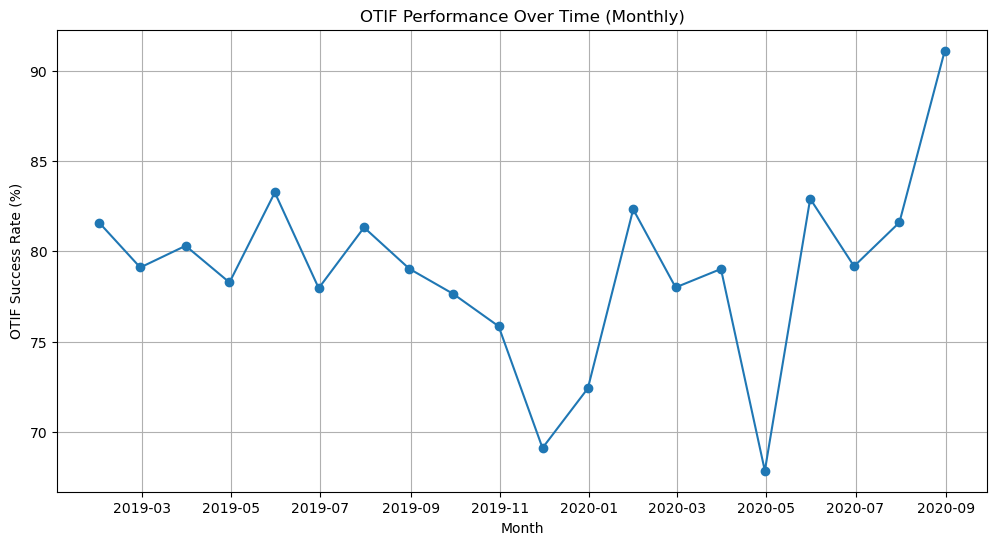

In [43]:
# Plot the OTIF success rate over time
plt.figure(figsize=(12, 6))
plt.plot(otif_monthly.index, otif_monthly, marker='o')
plt.title('OTIF Performance Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('OTIF Success Rate (%)')
plt.grid(True)
plt.show()

In [17]:
# Categorize orders into 'Delivered On Time', 'Delivered Late', and 'Pending'
orders_df['DeliveryStatus'] = 'Delivered On Time'
orders_df.loc[orders_df['ActualDeliveryDate'] > orders_df['ScheduledDeliveryDate'], 'DeliveryStatus'] = 'Delivered Late'
orders_df.loc[orders_df['ActualDeliveryDate'].isnull(), 'DeliveryStatus'] = 'Pending'

In [23]:
# Group by month and calculate the count for each delivery status
delivery_status_monthly = orders_df.groupby([orders_df['OrderDate'].dt.to_period('M'), 'DeliveryStatus']).size().unstack().fillna(0)

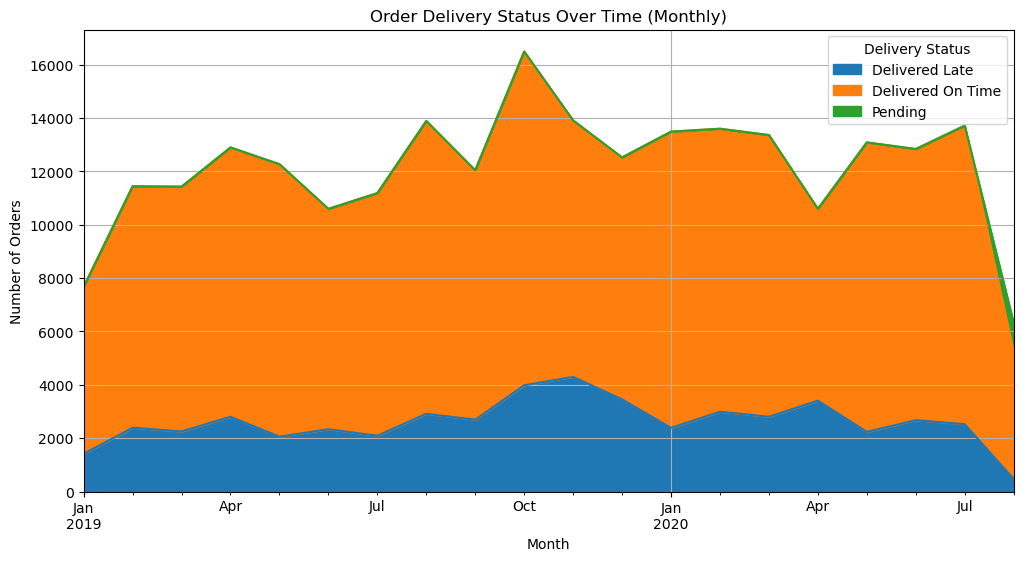

In [25]:
# Plot the Order Delivery Status Over Time (Monthly)
delivery_status_monthly.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Order Delivery Status Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.legend(title='Delivery Status')
plt.show()

In [56]:
# Merge 'orders_df' DataFrame with 'salesperson_df' DataFrame to get salesperson details
orders_with_salesperson_details = orders_df.merge(salesperson_df, left_on='SalespersonID', right_on='SalespersonID')

#Group by salesperson and calculate OTIF success rate 
top_salespeople_otif = orders_with_salesperson_details.groupby('Salesperson').apply(lambda x: (x['ActualDeliveryDate'] <= x['ScheduledDeliveryDate']).sum() / (x['ActualDeliveryDate'].notnull().sum()) * 100)
top_salespeople_otif = top_salespeople_otif.nlargest(10)

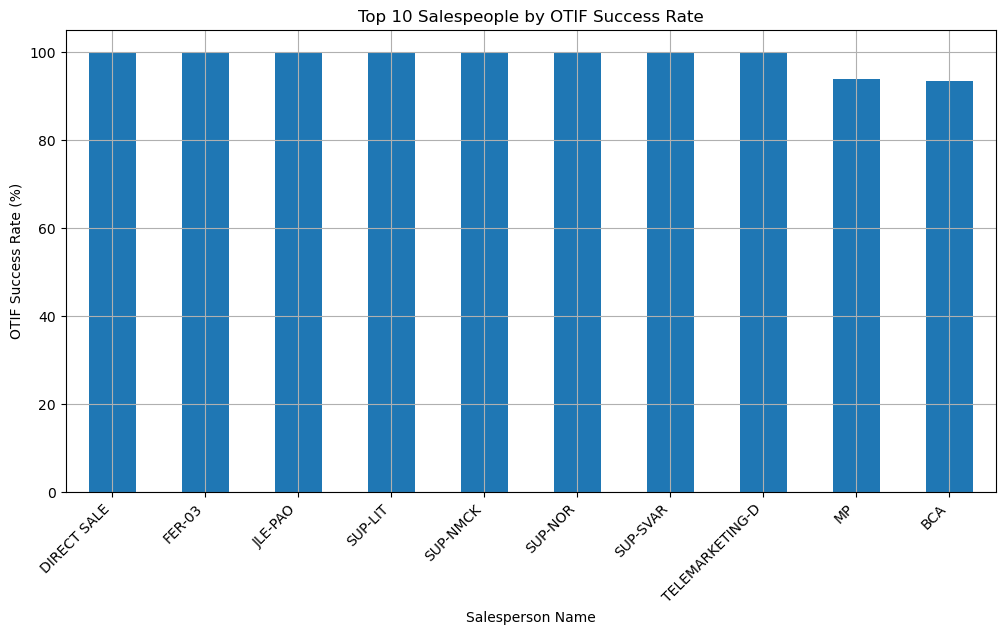

In [57]:
# Plot the top salespeople in terms of OTIF success rate
top_salespeople_otif.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Salespeople by OTIF Success Rate')
plt.xlabel('Salesperson Name')
plt.ylabel('OTIF Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [49]:
# Joining the orders_df with customer_df on CustomerID
customer_performance = orders_df.merge(customer_df, left_on='CustomerID', right_on='CustomerID')

# Calculate OTIF success for each customer
customer_performance['OTIF_Success'] = (customer_performance['ActualDeliveryDate'] <= customer_performance['ScheduledDeliveryDate'])
customer_otif_rate = customer_performance.groupby('Customer')['OTIF_Success'].mean() * 100

# Get the top 10 customers by OTIF success rate
top_customers_otif = customer_otif_rate.nlargest(10)
top_customers_otif

Customer
Customer 10       100.0
Customer 10000    100.0
Customer 10001    100.0
Customer 10002    100.0
Customer 10005    100.0
Customer 10009    100.0
Customer 10012    100.0
Customer 10014    100.0
Customer 10015    100.0
Customer 10018    100.0
Name: OTIF_Success, dtype: float64

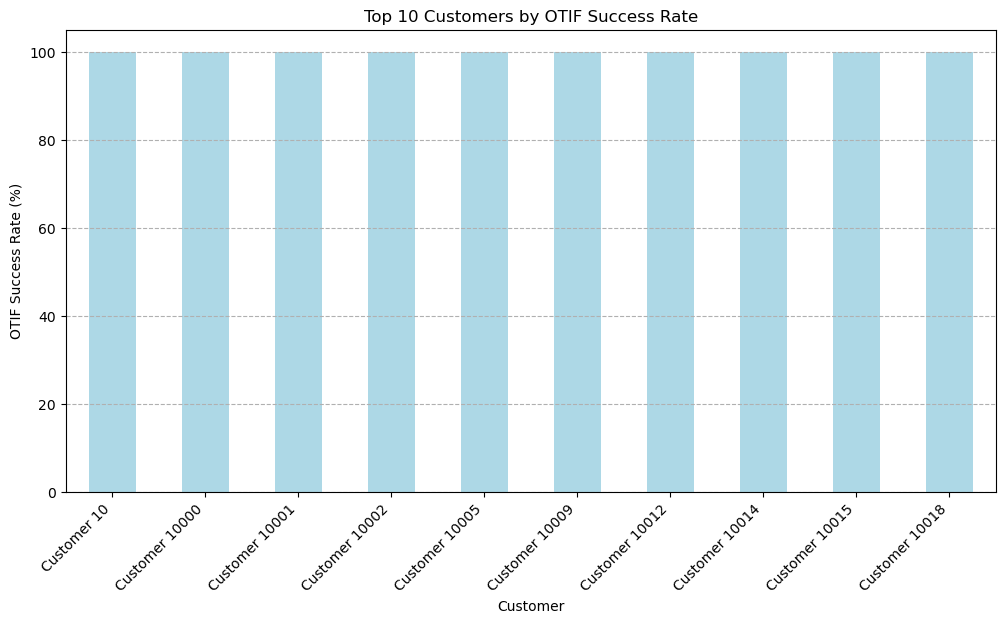

In [14]:
# Plot the top 10 customers by OTIF success rate
top_customers_otif.plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.title('Top 10 Customers by OTIF Success Rate')
plt.xlabel('Customer')
plt.ylabel('OTIF Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

In [50]:
# Joining the orders_df with customer_df and city_df on CustomerID and CityID
city_performance = orders_df.merge(customer_df, left_on='CustomerID', right_on='CustomerID')
city_performance = city_performance.merge(city_df, left_on='CityID', right_on='CityID')

# Calculate OTIF success for each city
city_performance['OTIF_Success'] = (city_performance['ActualDeliveryDate'] <= city_performance['ScheduledDeliveryDate'])
city_otif_rate = city_performance.groupby('City')['OTIF_Success'].mean() * 100

# Get the top 10 cities by OTIF success rate
top_cities_otif = city_otif_rate.nlargest(10)
top_cities_otif

City
Lancaster           100.000000
Midland             100.000000
Green Bay            97.291667
Elizabeth            96.265560
Rancho Cucamonga     95.135135
Hayward              94.813084
Little Rock          93.416928
Pueblo               92.519685
Baton Rouge          92.420000
San Francisco        92.006395
Name: OTIF_Success, dtype: float64

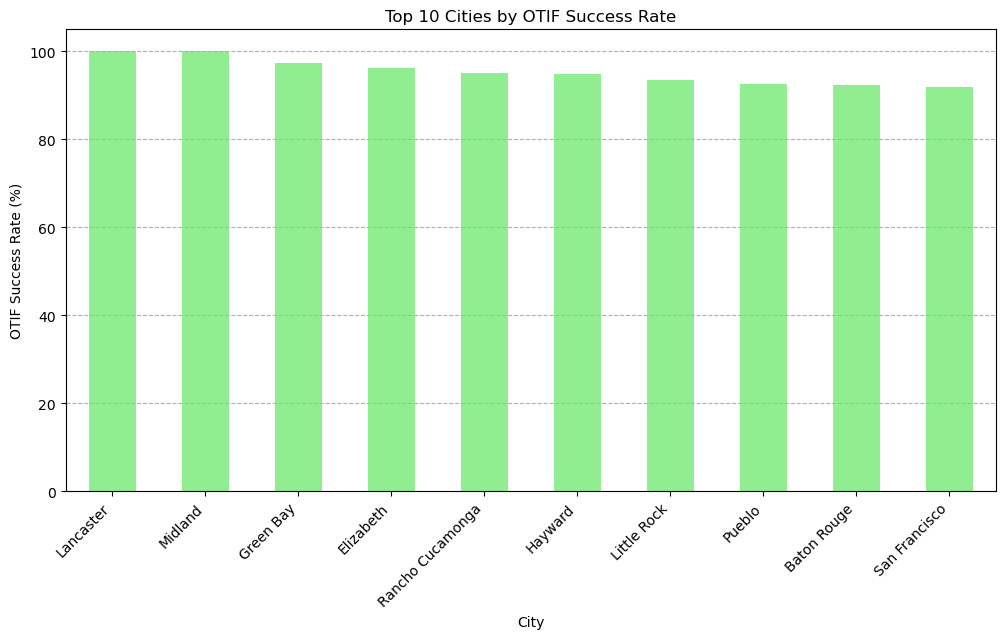

In [17]:
# Plot the top 10 cities by OTIF success rate
top_cities_otif.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Top 10 Cities by OTIF Success Rate')
plt.xlabel('City')
plt.ylabel('OTIF Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

In [51]:
# Merge orders_df with salesperson_df, customer_df, and city_df to create a comprehensive DataFrame
correlation_df = orders_df.merge(salesperson_df, left_on='SalespersonID', right_on='SalespersonID')
correlation_df = correlation_df.merge(customer_df, left_on='CustomerID', right_on='CustomerID')
correlation_df = correlation_df.merge(city_df, left_on='CityID', right_on='CityID')

# Encode categorical features like Salesperson, Customer, and City
correlation_df['Salesperson'] = correlation_df['Salesperson'].astype('category').cat.codes
correlation_df['Customer'] = correlation_df['Customer'].astype('category').cat.codes
correlation_df['City'] = correlation_df['City'].astype('category').cat.codes

# Calculate OTIF success as a binary variable
correlation_df['OTIF_Success'] = (correlation_df['ActualDeliveryDate'] <= correlation_df['ScheduledDeliveryDate']).astype(int)

# Calculate the correlation matrix for selected features
selected_features = ['Salesperson', 'Customer', 'City', 'OTIF_Success']
correlation_matrix = correlation_df[selected_features].corr()
correlation_matrix

,Salesperson,Customer,City,OTIF_Success
Salesperson,1.000000,0.011085,0.049079,-0.081292
Customer,0.011085,1.000000,0.009299,-0.007517
City,0.049079,0.009299,1.000000,-0.024176
OTIF_Success,-0.081292,-0.007517,-0.024176,1.000000


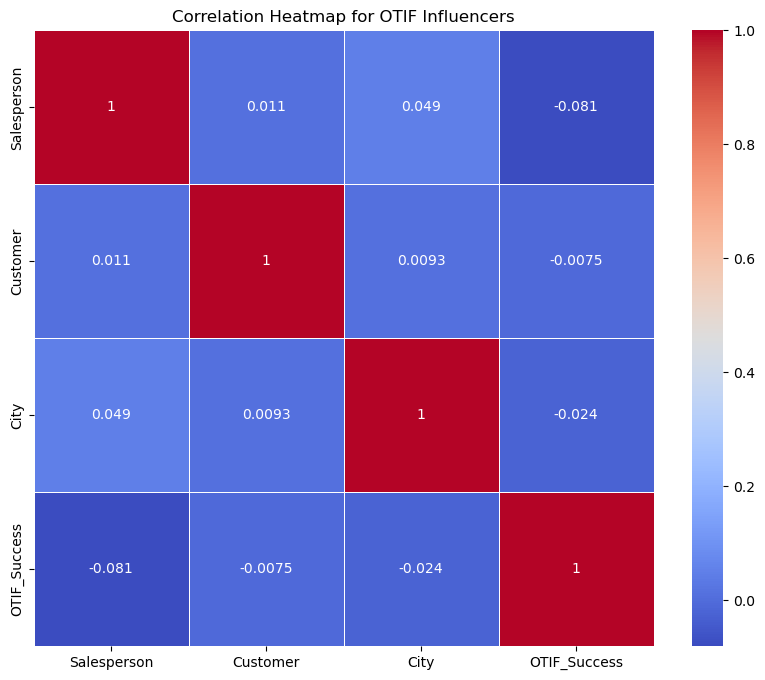

In [52]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for OTIF Influencers')
plt.show()

In [53]:
# Merge 'orders_df' DataFrame with 'salesperson_df' DataFrame to get salesperson details
orders_with_salesperson_details = orders_df.merge(salesperson_df, left_on='SalespersonID', right_on='SalespersonID')

# Categorize orders into 'On Time', 'Late', and 'Pending'
orders_with_salesperson_details['DeliveryStatus'] = 'On Time'
orders_with_salesperson_details.loc[orders_with_salesperson_details['ActualDeliveryDate'] > orders_with_salesperson_details['ScheduledDeliveryDate'], 'DeliveryStatus'] = 'Late'
orders_with_salesperson_details.loc[orders_with_salesperson_details['ActualDeliveryDate'].isnull(), 'DeliveryStatus'] = 'Pending'

# Group by salesperson and calculate the count for each delivery status
salesperson_performance_breakdown = orders_with_salesperson_details.groupby(['Salesperson', 'DeliveryStatus']).size().unstack().fillna(0)
salesperson_performance_breakdown

DeliveryStatus,Late,On Time,Pending
Salesperson,,,
ARA,929.0,3688.0,8.0
BCA,622.0,8777.0,16.0
BCA-CMB,521.0,6090.0,9.0
BCN,403.0,3077.0,17.0
BIG,524.0,2546.0,9.0
...,...,...,...
TLV-4,69.0,265.0,0.0
TLV-6,338.0,1588.0,4.0
TLV-7,183.0,786.0,0.0


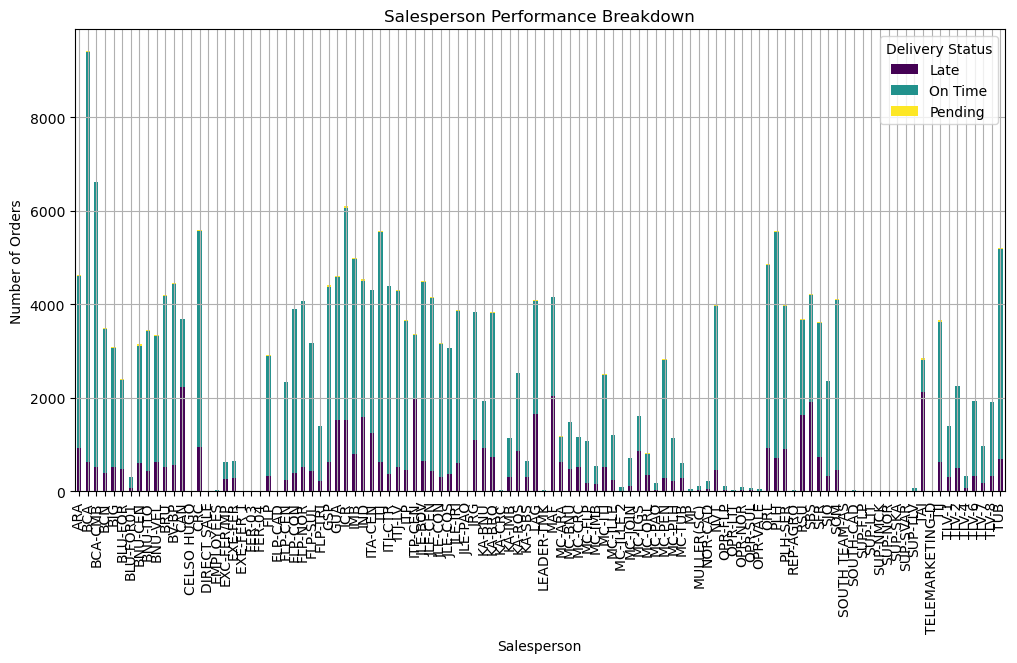

In [25]:
# Stacked bar plot to show the performance breakdown for each salesperson
salesperson_performance_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Salesperson Performance Breakdown')
plt.xlabel('Salesperson')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status')
plt.grid(True)
plt.show()